In [1]:

# Monte Carlo Simulation of a Golf Tournament
# 1 Introduction
# In this exercise, we would like you to write code to perform a Monte Carlo simulation of a golf tournament. Your code
# should take a list of golfers, along with some parameters describing their golfing ability, and determine the probability
# of winning, and of finishing in the top five, for each of them. The scoring rules for a golf tournament, and the process
# of Monte Carlo simulation, are explained below.
# 2 Structure of a Golf Tournament
# Golf is a game in which a number of players attempt to hit a ball into a hole, using a club. A round of golf consists of
# 18 holes, and a golf tournament consists of 4 rounds. Each player scores a point every time they hit the ball with their
# club, and their score for the tournament is the sum of their scores for all holes in all rounds. The expected number of
# points per round, in general, is about 72, so a golfer’s score for a whole tournament will be about 288.
# The player with the lowest score wins the tournament.
# In your simulation, you should assume that a golfer’s score for a round is given by a normal (Gaussian) distribution.
# The mean and standard deviation of this distribution form our “rating” for that golfer. At the end of this document is
# a link to the names and ratings of twenty top golfers; this will be the input to your simulation.
# 2.1 Determining the Winner and Top 5
# Imagine that 8 golfers compete in a tournament and get the scores shown in table 1. In this tournament, every player
# got a unique score, so there are no ties. Rory McIlroy got the lowest score, and so wins outright. If we had placed a
# bet on McIlroy to win the tournament, we would get the entire payout, so we say his win fraction is 1, while everyone
# else’s is 0.
# Similarly, McIlroy, Spieth, Garcia, Woods, and Perry are the only players in the top five. If we had placed a bet on any
# of them to finish in the top 5, then we would again get the whole payout. Each of them has a “top 5 fraction” of 1, while
# everyone below them in the table has a “top 5 fraction” of 0.
# The situation is a little more complicated if golfers are tied. Consider the leaderboard in table 2. McIlroy and Spieth
# are joint winners, each scoring 288. If we had bet on either of them to win, our payout would be reduced by one half.
# Each of them gets a “win fraction” of 1/2, because there is one spot shared between two players.
# We consider an N-way tie in an outright winner market to give 1/N wins to each player involved.
# Golfer Tournament Score Win Fraction Top 5 Fraction
# Rory McIlroy 288 1 1
# Jordan Spieth 289 0 1
# Sergio Garcia 290 0 1
# Tiger Woods 291 0 1
# Kenny Perry 292 0 1
# John Cook 293 0 0
# Jaco Van Zyl 294 0 0
# Justin Rose 295 0 0
# Table 1: Golf tournament with no ties
# 1
# Golfer Tournament Score Win Fraction Top 5 Fraction
# Rory McIlroy 288 1/2 1
# Jordan Spieth 288 1/2 1
# Sergio Garcia 290 0 1
# Tiger Woods 291 0 2/3
# Kenny Perry 291 0 2/3
# John Cook 291 0 2/3
# Jaco Van Zyl 294 0 0
# Justin Rose 295 0 0
# Table 2: Golf tournament with tied scores
# When it comes to considering the top 5 finish, we can see that McIlroy, Spieth, and Garcia should all definitely be in
# the top 5. The next 2 spots in the top five, however (positions four and five), must be shared between the three players
# who scored 291 - Woods, Perry, and Cook. Each of them gets a “top 5 fraction” of two thirds.
# If N players are tied for P places in the top 5, each player is considered to be in the top 5 with fraction P/N.
# 3 Monte Carlo Simulations
# A Monte Carlo simulation is a method to calculate properties of a probability distribution by randomly sampling
# values from it. In this exercise, we have a probability distribution for each golfer that describes their score in a single
# round. The algorithm for a single iteration of the Monte Carlo process is:
# 1. Generate a random score for a whole tournament for each golfer. The scores should be drawn according to the
# score probability distribution for each golfer.
# 2. Determine the win fraction and top 5 fraction for each player
# The final output of your simulation should be the win fraction and top 5 fraction for each player, averaged over many
# such iterations. It is up to you to decide how many iterations is sufficient.
# 4 Details of the exercise
# You may use any language of your choice for this exercise, as well as any libraries that you wish – you should also
# feel free to look things up online while completing it.
# In Python, to generate a random number that falls within a normal distribution, you can use random.normalvariate(mean,
# stdev) from the standard library. If the language you choose doesn’t have a built-in function for generating normally-
# distributed random numbers, go ahead and copy any code you find online instead of writing the function yourself.
# You have around one hour to work on this task – you should prioritise getting working code that generates winning
# probabilities before starting work on the top 5 finish probabilities.
# You will find the file containing the names and ratings of the twenty golfers to use in this exercise at: http://
# pastebin.com/MxGnzjQP
# 2


In [2]:
import random

In [3]:
# define golfer data
golfer_data_raw = [
    ('Sergio Garcia', 68.99802084636, 2.8022106094),
    ('Tiger Woods', 69.35135041782, 2.7891506279),
    ('Kenny Perry', 69.91471916678, 2.779164583),
    ('Gonzalo Fernandez-Castano', 70.00454323213, 2.80730658184),
    ('Rory McIlroy', 70.03914628487, 2.81525581752),
    ('John Cook', 70.07314839476, 2.748840518),
    ('Jaco Van Zyl', 70.08926215876, 2.78426082931),
    ('Brandt Snedeker', 70.17987728156, 2.77189131799),
    ('Francesco Molinari', 70.21681358363, 2.74834473201),
    ('Matteo Manassero', 70.22010792006, 2.77346484857),
    ('Rocco Mediate', 70.24975090651, 2.78827651594),
    ('Phil Mickelson', 70.2831986625, 2.77942880401),
    ('Justin Rose', 70.28785317825, 2.75785755538),
    ('Jim Furyk', 70.29979751876, 2.74303206415),
    ('Luke Donald', 70.31075778923, 2.75356932454),
    ('South Africa', 70.32676162032, 2.752106981),
    ('Charl Schwartzel', 70.39461420897, 2.78476477706),
    ('Duffy Waldorf', 70.40624211864, 2.75608325682),
    ('Darren Fichardt', 70.42869494626, 2.7804524764),
    ('Jay Haas', 70.44274917206, 2.712519019)
]

In [4]:
golfer_names = [golfer[0] for golfer in golfer_data_raw]

In [21]:
# name, mean, stdev
# define golfer_data dict

def simulate_round():
    round_scores = {}
    for golfer_name, mean, stdev in golfer_data_raw:
        # sample from normal variate then round
        round_scores[golfer_name] = round(random.normalvariate(mean, stdev))
    return round_scores

In [22]:
def simulate_tournament():
    # simulate 4 rounds
    tournament_scores = {}
    for i in range(4):
        round_scores = simulate_round()
        for golfer_name, score in round_scores.items():
            tournament_scores[golfer_name] = tournament_scores.get(golfer_name, 0) + score
    return tournament_scores


In [23]:
# sort by score
tournament_scores = simulate_tournament()
sorted_scores = sorted(tournament_scores.items(), key=lambda x: x[1])
print(sorted_scores)

[('Tiger Woods', 265), ('Kenny Perry', 274), ('Rory McIlroy', 274), ('John Cook', 275), ('Sergio Garcia', 277), ('Jay Haas', 277), ('Luke Donald', 278), ('Jaco Van Zyl', 279), ('Francesco Molinari', 279), ('Jim Furyk', 281), ('Darren Fichardt', 281), ('Brandt Snedeker', 282), ('Matteo Manassero', 282), ('Charl Schwartzel', 282), ('Phil Mickelson', 283), ('South Africa', 283), ('Gonzalo Fernandez-Castano', 284), ('Rocco Mediate', 285), ('Justin Rose', 285), ('Duffy Waldorf', 287)]


In [24]:
# print top 10 scores, just the score
print([score for name, score in sorted_scores[:7]])

[265, 274, 274, 275, 277, 277, 278]


In [28]:
# calulate top 5 fraction

# get just scores of top 5
top_5_scores = [score for name, score in sorted_scores[:5]]

In [30]:
tournament_scores

{'Sergio Garcia': 277,
 'Tiger Woods': 265,
 'Kenny Perry': 274,
 'Gonzalo Fernandez-Castano': 284,
 'Rory McIlroy': 274,
 'John Cook': 275,
 'Jaco Van Zyl': 279,
 'Brandt Snedeker': 282,
 'Francesco Molinari': 279,
 'Matteo Manassero': 282,
 'Rocco Mediate': 285,
 'Phil Mickelson': 283,
 'Justin Rose': 285,
 'Jim Furyk': 281,
 'Luke Donald': 278,
 'South Africa': 283,
 'Charl Schwartzel': 282,
 'Duffy Waldorf': 287,
 'Darren Fichardt': 281,
 'Jay Haas': 277}

In [29]:
top_5_scores

[265, 274, 274, 275, 277]

In [36]:
# sorted list of set of top 5 scores
scores_to_consider = sorted(list(set(top_5_scores)))

In [37]:
scores_to_consider

[265, 274, 275, 277]

In [38]:
# now we need to consider everyone with these scores

top_5_fraction = {}
point_to_distribute = 5
for good_score in scores_to_consider:
    print(good_score)
    players_with_score = [name for name, score in tournament_scores.items() if score == good_score]
    number_of_players_with_score = len(players_with_score)
    print(players_with_score)
    # each players gets min(1, point_to_distribute / number_of_players_with_score)
    player_points = min(1, point_to_distribute / number_of_players_with_score)
    for player in players_with_score:
        top_5_fraction[player] = player_points
    point_to_distribute -= player_points * number_of_players_with_score
    if point_to_distribute <= 0:
        break

265
['Tiger Woods']
274
['Kenny Perry', 'Rory McIlroy']
275
['John Cook']
277
['Sergio Garcia', 'Jay Haas']


In [39]:
top_5_fraction

{'Tiger Woods': 1,
 'Kenny Perry': 1,
 'Rory McIlroy': 1,
 'John Cook': 1,
 'Sergio Garcia': 0.5,
 'Jay Haas': 0.5}

In [40]:
# looks good

In [41]:
# for win fraction, just need to look at the winning score
win_fraction = {}
winning_score = sorted_scores[0][1]
winners = [name for name, score in tournament_scores.items() if score == winning_score]
for winner in winners:
    win_fraction[winner] = 1 / len(winners)

win_fraction

{'Tiger Woods': 1.0}

In [42]:
# function to simulate tournament and return win fraction and top 5 fraction

def simulate_fractions():
    tournament_scores = simulate_tournament()
    sorted_scores = sorted(tournament_scores.items(), key=lambda x: x[1])
    top_5_scores = [score for name, score in sorted_scores[:5]]
    scores_to_consider = sorted(list(set(top_5_scores)))
    top_5_fraction = {}
    point_to_distribute = 5
    for good_score in scores_to_consider:
        players_with_score = [name for name, score in tournament_scores.items() if score == good_score]
        number_of_players_with_score = len(players_with_score)
        player_points = min(1, point_to_distribute / number_of_players_with_score)
        for player in players_with_score:
            top_5_fraction[player] = player_points
        point_to_distribute -= player_points * number_of_players_with_score
        if point_to_distribute <= 0:
            break
    winning_score = sorted_scores[0][1]
    winners = [name for name, score in tournament_scores.items() if score == winning_score]
    win_fraction = {}
    for winner in winners:
        win_fraction[winner] = 1 / len(winners)
    return win_fraction, top_5_fraction

In [43]:
win, top_5 = simulate_fractions()

In [44]:
win

{'Tiger Woods': 1.0}

In [45]:
top_5

{'Tiger Woods': 1,
 'John Cook': 1,
 'Jay Haas': 1,
 'Brandt Snedeker': 0.6666666666666666,
 'Justin Rose': 0.6666666666666666,
 'South Africa': 0.6666666666666666}

In [46]:
# looks good

In [47]:
# simulate many tournaments

n = 10000
win_sum = {golfer_names: 0 for golfer_names in golfer_names}
top_5_sum = {golfer_names: 0 for golfer_names in golfer_names}
for i in range(n):
    win_fraction, top_5_fraction = simulate_fractions()
    for golfer, fraction in win_fraction.items():
        win_sum[golfer] += fraction
    for golfer, fraction in top_5_fraction.items():
        top_5_sum[golfer] += fraction

# average

win_avg = {golfer: win_sum[golfer] / n for golfer in golfer_names}
top_5_avg = {golfer: top_5_sum[golfer] / n for golfer in golfer_names}

In [49]:
# sort by win avg
sorted_win_avg = sorted(win_avg.items(), key=lambda x: x[1], reverse=True)
sorted_win_avg

[('Sergio Garcia', 0.18279833333333312),
 ('Tiger Woods', 0.11872333333333338),
 ('Kenny Perry', 0.064725),
 ('Gonzalo Fernandez-Castano', 0.055641666666666666),
 ('Rory McIlroy', 0.05039166666666665),
 ('Jaco Van Zyl', 0.04774333333333332),
 ('John Cook', 0.04323833333333332),
 ('Brandt Snedeker', 0.04193333333333333),
 ('Rocco Mediate', 0.04081166666666666),
 ('Matteo Manassero', 0.03775333333333332),
 ('Francesco Molinari', 0.036386666666666664),
 ('Phil Mickelson', 0.034144999999999995),
 ('Justin Rose', 0.033633333333333335),
 ('Luke Donald', 0.03341166666666666),
 ('South Africa', 0.03286499999999999),
 ('Jim Furyk', 0.031808333333333334),
 ('Charl Schwartzel', 0.03173666666666666),
 ('Duffy Waldorf', 0.030695),
 ('Darren Fichardt', 0.026391666666666674),
 ('Jay Haas', 0.025166666666666674)]

In [50]:
# sort by top 5 avg
sorted_top_5_avg = sorted(top_5_avg.items(), key=lambda x: x[1], reverse=True)
sorted_top_5_avg

[('Sergio Garcia', 0.5521816666666663),
 ('Tiger Woods', 0.44213190476190467),
 ('Kenny Perry', 0.2981783333333332),
 ('Gonzalo Fernandez-Castano', 0.27114023809523785),
 ('Rory McIlroy', 0.2613619047619048),
 ('John Cook', 0.25051833333333345),
 ('Jaco Van Zyl', 0.24621499999999996),
 ('Brandt Snedeker', 0.24027000000000004),
 ('Matteo Manassero', 0.22707166666666675),
 ('Rocco Mediate', 0.22249357142857137),
 ('Francesco Molinari', 0.22009500000000012),
 ('Phil Mickelson', 0.21515666666666672),
 ('Justin Rose', 0.20991833333333348),
 ('Luke Donald', 0.20522500000000005),
 ('Jim Furyk', 0.20387833333333338),
 ('South Africa', 0.1976233333333333),
 ('Charl Schwartzel', 0.19642023809523804),
 ('Duffy Waldorf', 0.1864202380952381),
 ('Darren Fichardt', 0.18026833333333334),
 ('Jay Haas', 0.1734319047619048)]

In [51]:
import matplotlib.pyplot as plt

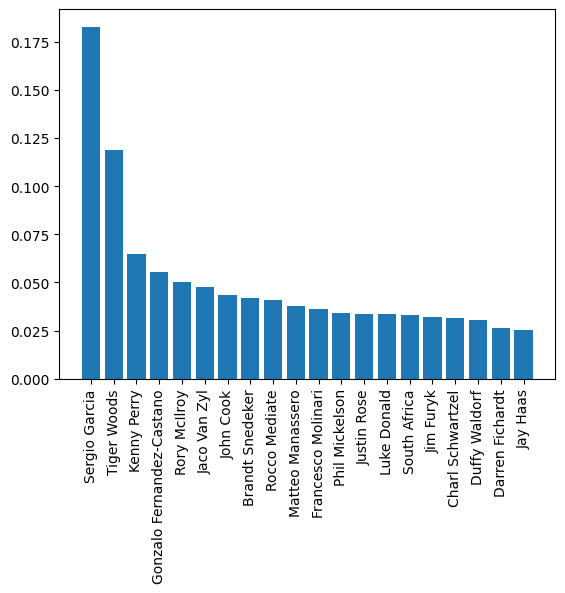

In [52]:
# plot win avg
plt.bar(range(len(sorted_win_avg)), [x[1] for x in sorted_win_avg])
plt.xticks(range(len(sorted_win_avg)), [x[0] for x in sorted_win_avg], rotation=90)
plt.show()